## 1.データの読み込み

In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('train.tsv', delimiter = '\t') #tsvの場合は読み込む際にdelimiter = '\t'  Tab Separated Value でTSV
test = pd.read_csv('test.tsv', delimiter = '\t')
submission = pd.read_csv('sample_submit.csv')

In [3]:
submission

,1,0
0,2,1
1,5,0
2,6,0
3,8,1
4,10,0
...,...,...
466,938,0
467,939,1
468,940,1
469,941,1


In [4]:
data = pd.concat([train, test], sort = False)

In [5]:
data.head()

,id,Tournament,Sex,Year,Player1,Player2,Round,Result,FNL.1,FNL.2,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
0,0,FrenchOpen,men,2013,Jarkko Nieminen,Paul-Henri Mathieu,1,1.0,3.0,2.0,...,5.0,15.0,24.0,33.0,163.0,4.0,6.0,6.0,6.0,2.0
1,3,AusOpen,women,2013,Varvara Lepchenko,Simona Halep,2,0.0,1.0,2.0,...,6.0,15.0,1.0,2.0,90.0,4.0,6.0,6.0,NaN,NaN
2,4,Wimbledon,women,2013,H.Watson,M.Keys,1,0.0,0.0,2.0,...,7.0,5.0,8.0,5.0,NaN,6.0,7.0,NaN,NaN,NaN
3,7,USOpen,women,2013,S Williams,F Schiavone,1,1.0,2.0,0.0,...,0.0,0.0,6.0,3.0,NaN,0.0,1.0,NaN,NaN,NaN
4,9,AusOpen,women,2013,Tadeja Majeric,Ajla Tomljanovic,1,0.0,1.0,2.0,...,3.0,6.0,NaN,NaN,97.0,3.0,7.0,6.0,NaN,NaN


## 2.EDA

In [6]:
data.describe()

,id,Year,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
count,943.000000,943.0,943.000000,471.000000,942.000000,942.000000,943.000000,943.000000,943.000000,943.000000,...,942.000000,942.000000,859.000000,860.000000,631.000000,942.000000,939.000000,622.000000,221.000000,86.000000
mean,471.000000,2013.0,1.844115,0.475584,1.490446,1.492569,62.256628,38.785790,37.785790,16.729586,...,5.209130,7.095541,15.942957,17.589535,94.521395,4.816348,4.695421,4.823151,4.710407,5.127907
std,272.364951,0.0,1.254328,0.499934,1.156883,1.173316,7.921985,17.486747,7.917886,8.607756,...,3.830328,5.026963,12.426671,12.870905,36.974755,1.897262,1.948946,1.868696,1.894329,1.839415
min,0.000000,2013.0,1.000000,0.000000,0.000000,0.000000,38.000000,3.000000,14.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,235.500000,2013.0,1.000000,0.000000,0.000000,0.000000,57.000000,26.000000,33.000000,10.000000,...,2.000000,3.000000,8.000000,8.000000,64.000000,3.000000,3.000000,3.000000,3.000000,4.000000
50%,471.000000,2013.0,1.000000,0.000000,2.000000,2.000000,62.000000,37.000000,38.000000,15.000000,...,5.000000,6.000000,13.000000,15.000000,92.000000,6.000000,6.000000,6.000000,6.000000,6.000000
75%,706.500000,2013.0,2.000000,1.000000,2.000000,3.000000,67.000000,49.000000,43.000000,22.000000,...,7.000000,10.000000,21.000000,24.000000,119.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,942.000000,2013.0,7.000000,1.000000,3.000000,3.000000,86.000000,109.000000,62.000000,52.000000,...,25.000000,26.000000,82.000000,81.000000,230.000000,7.000000,7.000000,9.000000,7.000000,9.000000


In [7]:
print('全データ数 : ' + str(len(data)))
print('Player1のユニークな数 : ' + str(len(data['Player1'].unique())))
print('Player2のユニークな数 : ' + str(len(data['Player2'].unique())))

全データ数 : 943
Player1のユニークな数 : 478
Player2のユニークな数 : 472


player1, player2が頻繁に出てくるわけではないのでplayが勝敗の分析要因の一つとするのは難しそう。しかし、勝ったプレーヤーはテストケースでも勝つ可能性が高いと考えられるのでプレーヤーを加味した分析も考えられるかも（まだまだ先の話だが）
ひとまずplayerのカラムを削除しても問題はなさそう。

In [8]:
data_1 = data.drop(['Player1', 'Player2'], axis = 1)
data_1 #data_1はPlayerのカラムを除いたもの

,id,Tournament,Sex,Year,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
0,0,FrenchOpen,men,2013,1,1.0,3.0,2.0,69,84,...,5.0,15.0,24.0,33.0,163.0,4.0,6.0,6.0,6.0,2.0
1,3,AusOpen,women,2013,2,0.0,1.0,2.0,63,34,...,6.0,15.0,1.0,2.0,90.0,4.0,6.0,6.0,NaN,NaN
2,4,Wimbledon,women,2013,1,0.0,0.0,2.0,53,18,...,7.0,5.0,8.0,5.0,NaN,6.0,7.0,NaN,NaN,NaN
3,7,USOpen,women,2013,1,1.0,2.0,0.0,51,13,...,0.0,0.0,6.0,3.0,NaN,0.0,1.0,NaN,NaN,NaN
4,9,AusOpen,women,2013,1,0.0,1.0,2.0,72,54,...,3.0,6.0,NaN,NaN,97.0,3.0,7.0,6.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,938,FrenchOpen,women,2013,1,NaN,2.0,0.0,74,27,...,3.0,8.0,5.0,9.0,64.0,6.0,1.0,NaN,NaN,NaN
468,939,FrenchOpen,women,2013,1,NaN,2.0,0.0,70,28,...,3.0,8.0,4.0,8.0,58.0,5.0,2.0,NaN,NaN,NaN
469,940,AusOpen,women,2013,2,NaN,2.0,1.0,66,35,...,5.0,6.0,19.0,34.0,76.0,6.0,2.0,2.0,NaN,NaN
470,941,AusOpen,women,2013,3,NaN,2.0,0.0,61,23,...,1.0,3.0,3.0,4.0,43.0,2.0,2.0,NaN,NaN,NaN


In [9]:
data_2 = data_1.drop(['Tournament', 'Year'], axis = 1)
data_2 #data_2はdata_1からさらに不必要と思えるトーナメント名と年を除いたもの

,id,Sex,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
0,0,men,1,1.0,3.0,2.0,69,84,31,29,...,5.0,15.0,24.0,33.0,163.0,4.0,6.0,6.0,6.0,2.0
1,3,women,2,0.0,1.0,2.0,63,34,37,10,...,6.0,15.0,1.0,2.0,90.0,4.0,6.0,6.0,NaN,NaN
2,4,women,1,0.0,0.0,2.0,53,18,47,13,...,7.0,5.0,8.0,5.0,NaN,6.0,7.0,NaN,NaN,NaN
3,7,women,1,1.0,2.0,0.0,51,13,49,12,...,0.0,0.0,6.0,3.0,NaN,0.0,1.0,NaN,NaN,NaN
4,9,women,1,0.0,1.0,2.0,72,54,28,10,...,3.0,6.0,NaN,NaN,97.0,3.0,7.0,6.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,938,women,1,NaN,2.0,0.0,74,27,26,11,...,3.0,8.0,5.0,9.0,64.0,6.0,1.0,NaN,NaN,NaN
468,939,women,1,NaN,2.0,0.0,70,28,30,11,...,3.0,8.0,4.0,8.0,58.0,5.0,2.0,NaN,NaN,NaN
469,940,women,2,NaN,2.0,1.0,66,35,34,9,...,5.0,6.0,19.0,34.0,76.0,6.0,2.0,2.0,NaN,NaN
470,941,women,3,NaN,2.0,0.0,61,23,39,10,...,1.0,3.0,3.0,4.0,43.0,2.0,2.0,NaN,NaN,NaN


In [10]:
data_3 = data_2.replace({'men' : 0, 'women': 1})
data_3 #data_3はdata_2から男女を数字に変更したもの

,id,Sex,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
0,0,0,1,1.0,3.0,2.0,69,84,31,29,...,5.0,15.0,24.0,33.0,163.0,4.0,6.0,6.0,6.0,2.0
1,3,1,2,0.0,1.0,2.0,63,34,37,10,...,6.0,15.0,1.0,2.0,90.0,4.0,6.0,6.0,NaN,NaN
2,4,1,1,0.0,0.0,2.0,53,18,47,13,...,7.0,5.0,8.0,5.0,NaN,6.0,7.0,NaN,NaN,NaN
3,7,1,1,1.0,2.0,0.0,51,13,49,12,...,0.0,0.0,6.0,3.0,NaN,0.0,1.0,NaN,NaN,NaN
4,9,1,1,0.0,1.0,2.0,72,54,28,10,...,3.0,6.0,NaN,NaN,97.0,3.0,7.0,6.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,938,1,1,NaN,2.0,0.0,74,27,26,11,...,3.0,8.0,5.0,9.0,64.0,6.0,1.0,NaN,NaN,NaN
468,939,1,1,NaN,2.0,0.0,70,28,30,11,...,3.0,8.0,4.0,8.0,58.0,5.0,2.0,NaN,NaN,NaN
469,940,1,2,NaN,2.0,1.0,66,35,34,9,...,5.0,6.0,19.0,34.0,76.0,6.0,2.0,2.0,NaN,NaN
470,941,1,3,NaN,2.0,0.0,61,23,39,10,...,1.0,3.0,3.0,4.0,43.0,2.0,2.0,NaN,NaN,NaN


In [11]:
data_3.dtypes

id          int64
Sex         int64
Round       int64
Result    float64
FNL.1     float64
FNL.2     float64
FSP.1       int64
FSW.1       int64
SSP.1       int64
SSW.1       int64
ACE.1     float64
DBF.1     float64
WNR.1     float64
UFE.1     float64
BPC.1     float64
BPW.1     float64
NPA.1     float64
NPW.1     float64
TPW.1     float64
ST1.1     float64
ST2.1     float64
ST3.1     float64
ST4.1     float64
ST5.1     float64
FSP.2       int64
FSW.2       int64
SSP.2       int64
SSW.2       int64
ACE.2     float64
DBF.2     float64
WNR.2     float64
UFE.2     float64
BPC.2     float64
BPW.2     float64
NPA.2     float64
NPW.2     float64
TPW.2     float64
ST1.2     float64
ST2.2     float64
ST3.2     float64
ST4.2     float64
ST5.2     float64
dtype: object

In [12]:
train = data_3[:len(train)]
test = data_3[len(train):]

In [13]:
y_train = train['Result']
X_train = train.drop('Result', axis = 1)
X_test = test.drop('Result', axis = 1)

In [14]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty = 'l2', solver = 'sag', random_state = 0)

In [15]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Nanがある時点で機械学習が出来ないとのこと、、、データの整形をする必要がある

In [30]:
data_3.isnull().sum()

id          0
Sex         0
Round       0
Result    472
FNL.1       1
FNL.2       1
FSP.1       0
FSW.1       0
SSP.1       0
SSW.1       0
ACE.1      22
DBF.1       8
WNR.1     126
UFE.1     126
BPC.1       1
BPW.1       1
NPA.1      84
NPW.1      83
TPW.1     312
ST1.1       1
ST2.1       4
ST3.1     321
ST4.1     722
ST5.1     857
FSP.2       0
FSW.2       0
SSP.2       0
SSW.2       0
ACE.2      22
DBF.2       8
WNR.2     126
UFE.2     126
BPC.2       1
BPW.2       1
NPA.2      84
NPW.2      83
TPW.2     312
ST1.2       1
ST2.2       4
ST3.2     321
ST4.2     722
ST5.2     857
dtype: int64

In [20]:
data_3['ACE.1'].isna().any() #もしある列にNanがあった場合Falseをこれで確認できる
columns_list3 = data_3.columns.values
for i in range(len(columns_list3)):
    col = columns_list3[i]
    if data_3[col].isna().any() == True:
        data_3[col].fillna(data_3[col].mean()) #欠損値補完できてなくね？

In [18]:
data_3['FNL.1'].fillna(data_3['FNL.1'].mean())

0      3.0
1      1.0
2      0.0
3      2.0
4      1.0
      ... 
467    2.0
468    2.0
469    2.0
470    2.0
471    2.0
Name: FNL.1, Length: 943, dtype: float64

In [19]:
data_3.isna().any()

id        False
Sex       False
Round     False
Result     True
FNL.1      True
FNL.2      True
FSP.1     False
FSW.1     False
SSP.1     False
SSW.1     False
ACE.1      True
DBF.1      True
WNR.1      True
UFE.1      True
BPC.1      True
BPW.1      True
NPA.1      True
NPW.1      True
TPW.1      True
ST1.1      True
ST2.1      True
ST3.1      True
ST4.1      True
ST5.1      True
FSP.2     False
FSW.2     False
SSP.2     False
SSW.2     False
ACE.2      True
DBF.2      True
WNR.2      True
UFE.2      True
BPC.2      True
BPW.2      True
NPA.2      True
NPW.2      True
TPW.2      True
ST1.2      True
ST2.2      True
ST3.2      True
ST4.2      True
ST5.2      True
dtype: bool

## とりあえず欠損補完は置いとく、欠損を除いたテーブルを作成する

In [31]:
data_3.columns

Index(['id', 'Sex', 'Round', 'Result', 'FNL.1', 'FNL.2', 'FSP.1', 'FSW.1',
       'SSP.1', 'SSW.1', 'ACE.1', 'DBF.1', 'WNR.1', 'UFE.1', 'BPC.1', 'BPW.1',
       'NPA.1', 'NPW.1', 'TPW.1', 'ST1.1', 'ST2.1', 'ST3.1', 'ST4.1', 'ST5.1',
       'FSP.2', 'FSW.2', 'SSP.2', 'SSW.2', 'ACE.2', 'DBF.2', 'WNR.2', 'UFE.2',
       'BPC.2', 'BPW.2', 'NPA.2', 'NPW.2', 'TPW.2', 'ST1.2', 'ST2.2', 'ST3.2',
       'ST4.2', 'ST5.2'],
      dtype='object')

In [34]:
analyze_data1 = data_3[['id', 'Sex', 'Round', 'Result', 'FSP.1', 'FSW.1',
       'SSP.1', 'SSW.1', 
       'FSP.2', 'FSW.2', 'SSP.2', 'SSW.2']]

In [37]:
train = analyze_data1[:len(train)]
test = analyze_data1[len(train):]

In [38]:
y_train = train['Result']
X_train = train.drop('Result', axis = 1)
X_test = test.drop('Result', axis = 1)

In [39]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty = 'l2', solver = 'sag', random_state = 0)

In [40]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/Users/masato/miniforge3/envs/ds_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [45]:
y_pred

array([1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 0.

In [42]:
submission

,1,0
0,2,1
1,5,0
2,6,0
3,8,1
4,10,0
...,...,...
466,938,0
467,939,1
468,940,1
469,941,1


In [43]:
submission[0] = y_pred

ValueError: Length of values (472) does not match length of index (471)

In [1]:
import numpy as np
import pandas as pd

train = pd.read_csv('train.tsv', delimiter = '\t') #tsvの場合は読み込む際にdelimiter = '\t'  Tab Separated Value でTSV
test = pd.read_csv('test.tsv', delimiter = '\t')
submission = pd.read_csv('sample_submit.csv', header = None)

data = pd.concat([train, test], sort = False)

data_1 = data.drop(['Player1', 'Player2'], axis = 1)
data_1 #data_1はPlayerのカラムを除いたもの

data_2 = data_1.drop(['Tournament', 'Year'], axis = 1)
data_2 #data_2はdata_1からさらに不必要と思えるトーナメント名と年を除いたもの

data_3 = data_2.replace({'men' : 0, 'women': 1})
data_3 #data_3はdata_2から男女を数字に変更したもの

analyze_data1 = data_3[['id', 'Sex', 'Round', 'Result', 'FSP.1', 'FSW.1',
       'SSP.1', 'SSW.1', 
       'FSP.2', 'FSW.2', 'SSP.2', 'SSW.2']]

train = analyze_data1[:len(train)]
test = analyze_data1[len(train):]
y_train = train['Result']
X_train = train.drop('Result', axis = 1)
X_test = test.drop('Result', axis = 1)

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty = 'l2', solver = 'sag', random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/Users/masato/miniforge3/envs/ds_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [2]:
submission[1] = y_pred

In [3]:
submission = submission.astype(int)

In [4]:
submission.to_csv('submission_1.csv', index = False, header= False)

In [5]:
submission

,0,1
0,1,1
1,2,1
2,5,0
3,6,0
4,8,1
...,...,...
467,938,1
468,939,1
469,940,1
470,941,1


In [6]:
import numpy as np
import pandas as pd

train = pd.read_csv('train.tsv', delimiter = '\t') #tsvの場合は読み込む際にdelimiter = '\t'  Tab Separated Value でTSV
test = pd.read_csv('test.tsv', delimiter = '\t')
submission = pd.read_csv('sample_submit.csv', header = None)

data = pd.concat([train, test], sort = False)
data = data[['Result', 'FNL.1', 'FNL.2']]

data['FNL.1'] = data['FNL.1'].fillna(1)
data['FNL.2'] = data['FNL.2'].fillna(0)



train = data[:len(train)]
test = data[len(train):]
y_train = train['Result']
X_train = train.drop('Result', axis = 1)
X_test = test.drop('Result', axis = 1)

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty = 'l2', solver = 'sag', random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [7]:
submission[1] = y_pred
submission = submission.astype(int)
submission.to_csv('submission_1.csv', index = False, header= False)
submission

,0,1
0,1,1
1,2,1
2,5,0
3,6,0
4,8,1
...,...,...
467,938,1
468,939,1
469,940,1
470,941,1


In [8]:
import lightgbm as lgb

In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split

train = pd.read_csv('train.tsv', delimiter = '\t') #tsvの場合は読み込む際にdelimiter = '\t'  Tab Separated Value でTSV
test = pd.read_csv('test.tsv', delimiter = '\t')
submission = pd.read_csv('sample_submit.csv', header = None)

data = pd.concat([train, test], sort = False)

data_1 = data.drop(['Player1', 'Player2'], axis = 1)
data_1 #data_1はPlayerのカラムを除いたもの

data_2 = data_1.drop(['Tournament', 'Year'], axis = 1)
data_2 #data_2はdata_1からさらに不必要と思えるトーナメント名と年を除いたもの

data_3 = data_2.replace({'men' : 0, 'women': 1})
data_3 #data_3はdata_2から男女を数字に変更したもの

train = data_3[:len(train)]
test = data_3[len(train):]
y_train = train['Result']
X_train = train.drop('Result', axis = 1)
X_test = test.drop('Result', axis = 1)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0, stratify = y_train)

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train)

params = {
    'objective' : 'binary'
}
model = lgb.train(params, lgb_train, 
                 valid_sets = [lgb_train, lgb_eval], 
                 verbose_eval = 10,
                 num_boost_round = 1000,
                 early_stopping_rounds = 10)

[LightGBM] [Info] Number of positive: 156, number of negative: 173
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1187
[LightGBM] [Info] Number of data points in the train set: 329, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.474164 -> initscore=-0.103436
[LightGBM] [Info] Start training from score -0.103436
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [2]:
y_pred = model.predict(X_test, num_iteration = model.best_iteration)

In [3]:
y_pred = (y_pred > 0.5).astype(int)

In [12]:
submission[1] = y_pred
submission = submission.astype(int)
submission.to_csv('submission_1.csv', index = False, header= False)
submission

,0,1
0,1,1
1,2,1
2,5,0
3,6,0
4,8,1
...,...,...
467,938,1
468,939,1
469,940,1
470,941,1


In [4]:
# feature importanceを表示
importance = pd.DataFrame(model.feature_importance(), index=X_train.columns, columns=['importance'])
display(importance)


,importance
id,113
Sex,1
Round,5
FNL.1,85
FNL.2,115
FSP.1,3
FSW.1,28
SSP.1,1
SSW.1,2
ACE.1,6


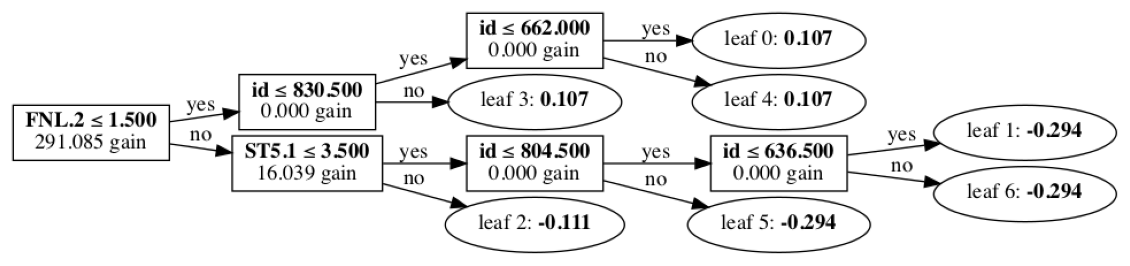

'Tree.gv.png'

In [9]:
import matplotlib.pyplot as plt
ax = lgb.plot_tree(model, tree_index=0, figsize=(20, 20), show_info=['split_gain'])
plt.show()
graph = lgb.create_tree_digraph(model, tree_index=0, format='png', name='Tree')
graph.render(view=True)

In [5]:
from graphviz import Digraph
dot = Digraph(comment='The Round Table')
dot
dot.node('A', 'King Arthur')
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')
dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')
print(dot.source)
dot.render('test-output/round-table.gv', view=True)

// The Round Table
digraph {
	A [label="King Arthur"]
	B [label="Sir Bedevere the Wise"]
	L [label="Sir Lancelot the Brave"]
	A -> B
	A -> L
	B -> L [constraint=false]
}


'test-output/round-table.gv.pdf'

In [12]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split

train = pd.read_csv('train.tsv', delimiter = '\t') #tsvの場合は読み込む際にdelimiter = '\t'  Tab Separated Value でTSV
test = pd.read_csv('test.tsv', delimiter = '\t')
submission = pd.read_csv('sample_submit.csv', header = None)

data = pd.concat([train, test], sort = False)

data_1 = data.drop(['Player1', 'Player2'], axis = 1)
data_1 #data_1はPlayerのカラムを除いたもの

data_2 = data_1.drop(['Tournament', 'Year'], axis = 1)
data_2 #data_2はdata_1からさらに不必要と思えるトーナメント名と年を除いたもの

data_3 = data_2.replace({'men' : 0, 'women': 1})
data_3 #data_3はdata_2から男女を数字に変更したもの

train = data_3[:len(train)]
test = data_3[len(train):]
y_train = train['Result']
X_train = train.drop('Result', axis = 1)
X_test = test.drop('Result', axis = 1)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0, stratify = y_train)

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train)

params = {
    'objective' : 'binary'
}
model = lgb.train(params, lgb_train, 
                 valid_sets = [lgb_train, lgb_eval], 
                 verbose_eval = 10,
                 num_boost_round = 1000,
                 early_stopping_rounds = 10)

y_pred = model.predict(X_test, num_iteration = model.best_iteration)
y_pred = (y_pred > 0.5).astype(int)

submission[1] = y_pred
submission = submission.astype(int)
submission.to_csv('submission_1.csv', index = False, header= False)


# feature importanceを表示
importance = pd.DataFrame(model.feature_importance(), index=X_train.columns, columns=['importance'])
display(importance)

import matplotlib.pyplot as plt
ax = lgb.plot_tree(model, tree_index=0, figsize=(20, 20), show_info=['split_gain'])
plt.show()
graph = lgb.create_tree_digraph(model, tree_index=0, format='png', name='Tree')
graph.render(view=True)


[LightGBM] [Info] Number of positive: 156, number of negative: 173
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001071 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1187
[LightGBM] [Info] Number of data points in the train set: 329, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.474164 -> initscore=-0.103436
[LightGBM] [Info] Start training from score -0.103436
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[110]	training's binary_logloss: 1.15762e-05	valid_1's binary_logloss: 3.03844e-05
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[120]	training's binary_logloss: 7.89401e-06	valid_1's binary_logloss: 2.77173e-05
[LightGBM

array([9.99993063e-01, 9.99994336e-01, 1.92762299e-05, 6.93534480e-06,
       9.99994336e-01, 9.99994336e-01, 5.13702745e-06, 9.99994336e-01,
       5.14363535e-06, 9.99993063e-01, 9.99947001e-01, 5.14667231e-06,
       9.99993063e-01, 9.99947001e-01, 9.99994336e-01, 5.13281705e-06,
       6.93547454e-06, 9.99994336e-01, 9.99993063e-01, 9.99993063e-01,
       9.99993063e-01, 9.99993063e-01, 9.99993063e-01, 9.99994336e-01,
       9.99994336e-01, 6.93530719e-06, 5.10903534e-06, 9.99994336e-01,
       6.92011775e-06, 9.99994336e-01, 9.99994336e-01, 5.07227880e-06,
       9.99993063e-01, 9.99947001e-01, 9.99993063e-01, 9.99994336e-01,
       6.93514009e-06, 9.99994336e-01, 6.93532518e-06, 6.93635831e-06,
       6.93295980e-06, 6.93030726e-06, 6.93549132e-06, 5.13604876e-06,
       5.13645469e-06, 5.08287373e-06, 5.13550616e-06, 1.24704956e-05,
       4.96020424e-06, 9.99993063e-01, 6.94845833e-06, 6.93105215e-06,
       6.93507061e-06, 9.99994336e-01, 6.93532522e-06, 9.99994336e-01,
      